<font color='green' size='6'>Italy </font>
<font color ='red' size='6'>Menu</font>
<br>

## Research Question
#### Generating meal compositions with AI

**Name:** Andrea <br>
**Name:** Emilio <br>
**Name:** Mayya Lihovodov <br>

**Name:** Igal Khalfin <br>
**Name:** Dima Vornov  <br>
**Name:** Adi Zamir    <br>
**Name:** Adir Nisim   <br>
**Name:** Nir Levy    <br>

Starting Date: 24/11/2022


<font color='green' size='5'>
Import Modules (Packages) </font>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import inf
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


<h1><ins>Data Handling Section </ins></h1>
<br>
* read CSV file <br>
* removing rows where quantity < 0 <br>
 * Adding Columns: <br>
<font color='darkgreen'>
    Price_Before_Discount(full price), <br>
    Earnings (Paid price - cost), <br>
    Margin (Earnings / paid price as precentage % view), <br>
    Unit_Price, <br>
    Sale_Month (for EDA and future purpess), <br>
    Menu Category, mapping category by specifay item name (food/soft drink/alcohol).
</font>

In [2]:
df = pd.read_csv('Query_Sicilia_2021.csv', index_col=0)  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df[df.QUANTITY < 0]

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE
2079,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-1,-1.0,0.0,-0.13,NaN
2080,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,MELANZANE AL POMODORO (C),FOOD,RICETTE FOOD,CONTORNO,-1,-3.9,0.0,-0.31,NaN
2081,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,COCA COLA 33CL TIN,BEVERAGE,ACQUA E SOFT DRINKS,SOFT DRINKS,-1,-3.0,0.0,-0.40,NaN
2082,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,FRUTTA FRESCA,FOOD,RICETTE FOOD,FRUTTA,-1,-3.1,0.0,-0.25,NaN
2083,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,GNOCCHI ALLA BOLOGNESE,FOOD,RICETTE FOOD,PRIMO,-1,-4.9,0.0,-0.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335501,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,HAMBURGER ALLA GRIGLIA (C),FOOD,RICETTE FOOD,SECONDO,-1,-8.0,0.0,-0.65,NaN
2335502,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-3,-3.0,0.0,-0.40,NaN
2335859,TENACIA,NAP-TRI,RI,599532021-10-09,20211009,20211009,BAR,TENACIA BAR,71,205011,20.0,VECCHIA ROMAGNA E.N. CL 4,BEVERAGE,RICETTE ALCOLICHE,SUPERALCOLICI LISCI,-1,-4.0,0.0,-0.68,NaN
2336556,TENACIA,NAP-TRI,IR,633972021-10-30,20211030,20211030,SELF,TENACIA Front Desk,16,133936,13.0,BIRRA BECK S 33CL BT,BEVERAGE,BIRRE,BIRRA PAX,-1,-4.5,0.0,-0.65,NaN


In [4]:
positive_quantity_df = df[df['QUANTITY'] > 0].copy()

positive_quantity_df['PRICE_BEFORE_DISCOUNT'] = positive_quantity_df['PRICE_PAID'] + positive_quantity_df['DISCOUNT']
positive_quantity_df['EARNINGS'] = positive_quantity_df['PRICE_PAID'] - positive_quantity_df['COST_OF_SALE']
positive_quantity_df["SALE_MONTH"] = pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).month
positive_quantity_df['MARGIN'] = positive_quantity_df['EARNINGS'] / positive_quantity_df['PRICE_PAID']
positive_quantity_df.loc[positive_quantity_df['MARGIN'] < 0, 'MARGIN'] = 0
positive_quantity_df['MARGIN_RAW'] = positive_quantity_df['MARGIN']
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'] * 100
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'].round(2).astype(str) + '%'
positive_quantity_df['UNIT_PRICE'] = positive_quantity_df['PRICE_PAID'] / positive_quantity_df['QUANTITY']
positive_quantity_df = positive_quantity_df[positive_quantity_df.MARGIN != inf]

In [5]:
menu_category = {
    'FOOD':[ 'CROISSANTS E BREAKFAST', 'SNACK', 'PIZZA', 'SALSE MONOPORZIONE', 'SECONDO', 'PRIMO', 'CONTORNO', 'PANE E COPERTO PASTI', 'ANTIPASTO', 
       'DOLCE', 'FRUTTA', 'PANINI', 'CARAMELLE', 'ALTRO', 'GELATI CONFEZIONATI', 'PANE E COPERTO BREAKFAST', 'CONFETTURE', 'CELIACI',
       'PIATTO UNICO', 'MERENDINE', 'PANE E SIMILI', 'CEREALI', 'FORMAGGI', 'BIBITE SCIROPPATE', 'YOGHURT', 'RICORRENZE E DECORAZIONI' ],
    'SOFT DRINK': [ 
        "CAFFE'", 'ACQUA', 'CAPPUCCINO', 'THE E INFUSI', 'SUCCHI', 'SOFT DRINKS', 'GRANITA', 'CIOCCOLATA', ],
    'ALCOHOL': [
        'VINI ITALIANI', 'SUPERALCOLICI LISCI', 'LATTE MACCHIATO', 'APERITIVO', 'BIRRA PAX', 'COCKTAILS', 'SPUMANTE', 'CHAMPAGNE', 'VINO BIANCO', ],
    'CORRECTION': ['CORREZIONE']
}
mapping = {}
for key in menu_category:
    for value in menu_category[key]:
        mapping[value] = key


positive_quantity_df['MENU_CATEGORY'] = positive_quantity_df['ITEM_CATEGORY'].map(mapping)

 <h1><ins>Data EDA-Visualization </ins></h1>
 <br>
 we want to get point of view from margin and earning

In [6]:
margin_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['MARGIN_RAW'], aggfunc=np.average)
margin_by_location

,MARGIN_RAW
POINT_OF_SALE_LOCATION,
ANTARES BAR 1,0.794625
ANTARES BAR 2,0.852819
ANTARES RISTORANTE,0.868285
ARIES BAR 1,0.795602
ARIES BAR 2,0.834957
...,...
SPL GELATERIA,0.854253
SPM BAR Centrale,0.727487
SPM BAR Piscina,0.732457


In [7]:
earnings_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_location

,EARNINGS
POINT_OF_SALE_LOCATION,
ANTARES BAR 1,215352.15
ANTARES BAR 2,61800.84
ANTARES Front Desk,3738.77
ANTARES RISTORANTE,123926.97
ANTARES Self Pax,187983.09
...,...
SPM RISTORANTE,16414.05
SPM SELF Passeggeri,95559.30
TENACIA BAR,161258.96


<AxesSubplot:xlabel='SHIP'>

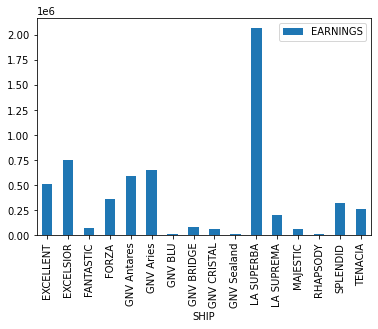

In [8]:
earnings_by_ship = pd.pivot_table(positive_quantity_df, index=['SHIP'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_ship.plot.bar()

<h2>Earnings By Month</h2>
<h4>As we can see, <strong>summer</strong> season is the stongest season of them all when it comes to earnings</h4>

<AxesSubplot:xlabel='SALE_MONTH'>

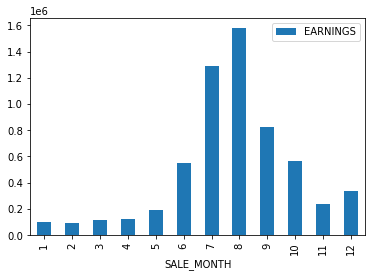

In [9]:
earnings_by_month = pd.pivot_table(positive_quantity_df, index=['SALE_MONTH'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_month.plot.bar()

<h2>Top sellers of each month</h2>
<h4>As we can see, <strong>Summer</strong> season is the stongest season of them all when it comes to earnings</h4>

In [10]:
#groupby_quantity = positive_quantity_df.groupby(['SALE_MONTH','ITEM_CATEGORY']).agg({'QUANTITY':sum})
#groupby_month = 
#_quantity['QUANTITY'].groupby('SALE_MONTH', group_keys=False)
#groupby_month.nlargest(3)


In [11]:
seasonal_df = positive_quantity_df.copy()
mapping = {}
for i in range(1,12):
    if(i<3):
        mapping[i]='Winter'
    elif(i>=3 and i<6):
        mapping[i]='Spring'
    elif(i>=6 and i <9):
        mapping[i]='Summer'
    else:
        mapping[i]='Autumn'
mapping[12]='Winter'
seasonal_df['Seasons']= seasonal_df['SALE_MONTH'].map(mapping)
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'QUANTITY':sum})

QUANTITY
Seasons MENU_CATEGORY          
Autumn  ALCOHOL           67651
        CORRECTION         1193
        FOOD             554480
        SOFT DRINK       359204
Spring  ALCOHOL           31752
        CORRECTION          980
        FOOD             299546
        SOFT DRINK       176328
Summer  ALCOHOL          110035
        CORRECTION         1579
        FOOD             864819
        SOFT DRINK       635686
Winter  ALCOHOL           27913
        CORRECTION          776
        FOOD             296348
        SOFT DRINK       174703

<AxesSubplot:ylabel='Seasons'>

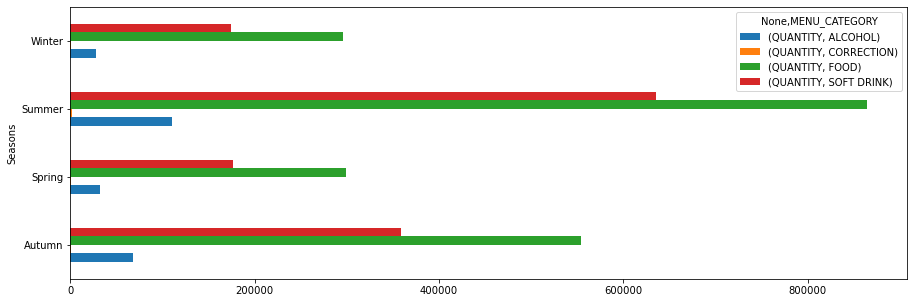

In [12]:
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'QUANTITY':sum}).unstack(1).plot.barh(figsize=(15,5))

<AxesSubplot:ylabel='Seasons'>

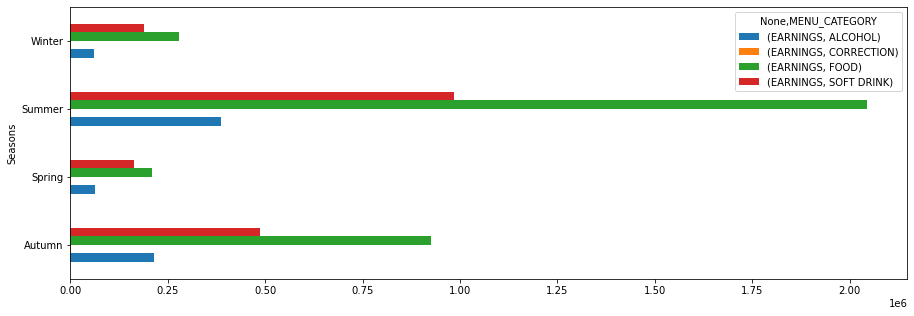

In [13]:
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'EARNINGS':sum}).unstack(1).plot.barh(figsize=(15,5))

<AxesSubplot:ylabel='SALE_DAY'>

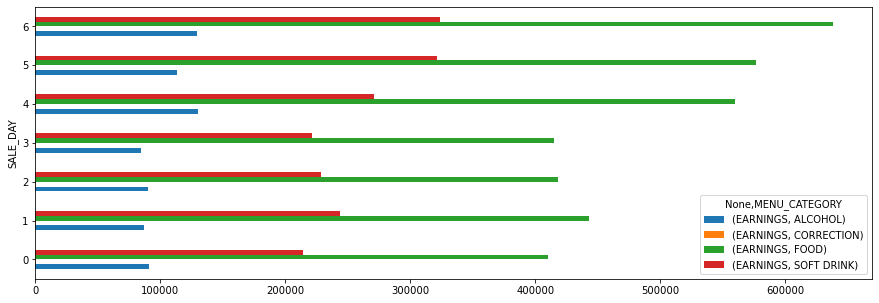

In [14]:

seasonal_df["SALE_DAY"]=pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).dayofweek
seasonal_df.groupby(['SALE_DAY','MENU_CATEGORY']).agg({'EARNINGS':sum}).unstack(1).plot.barh(figsize=(15,5))


<AxesSubplot:ylabel='SALE_DAY'>

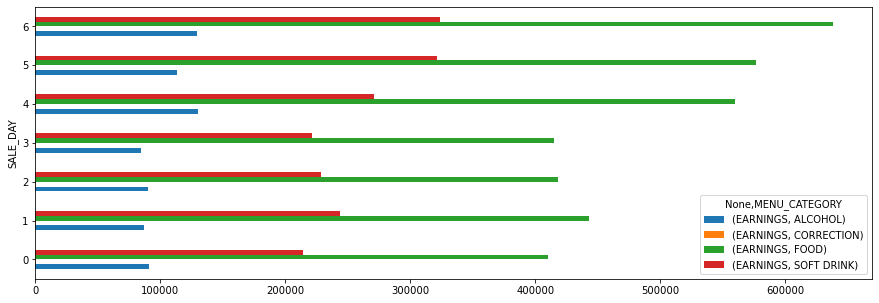

In [15]:
seasonal_df["SALE_DAY"]=pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).dayofweek
seasonal_df.groupby(['SALE_DAY','MENU_CATEGORY']).agg({'EARNINGS':'sum'},{'EARNINGS':'mean'}).unstack(1).plot.barh(figsize=(15,5))

## Sales season classification
### We will be classifing all the sales periods to season tiers of sales volumes: High, Mid, Low

In [16]:
mapping = {}
for i in range(1, 13):
    if(i in { 7, 8 }):
        mapping[i] = 'High'
    elif(i in { 6, 9, 10 }):
        mapping[i] = 'Mid'
    else:
        mapping[i] = 'Low'

seasonal_df['SALES_TIER_SEASON'] = seasonal_df['SALE_MONTH'].map(mapping)
seasonal_df

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE,PRICE_BEFORE_DISCOUNT,EARNINGS,SALE_MONTH,MARGIN,MARGIN_RAW,UNIT_PRICE,MENU_CATEGORY,Seasons,SALE_DAY,SALES_TIER_SEASON
0,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,2,75107,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',1,0.84,0.56,0.06,SPE,1.4,0.78,1,92.86%,0.928571,0.84,SOFT DRINK,Winter,4,Low
1,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,3,75123,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',2,1.68,1.12,0.13,SPE,2.8,1.55,1,92.26%,0.922619,0.84,SOFT DRINK,Winter,4,Low
2,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,4,80518,8.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,1.50,0.00,0.11,NaN,1.5,1.39,1,92.67%,0.926667,1.50,SOFT DRINK,Winter,4,Low
3,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.00,1.80,0.36,SA1,1.8,-0.36,1,0.0%,0.000000,0.00,FOOD,Winter,4,Low
4,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CAPPUCCINO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAPPUCCINO,1,0.00,2.00,0.15,SA1,2.0,-0.15,1,0.0%,0.000000,0.00,SOFT DRINK,Winter,4,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338035,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,0.00,1.50,0.11,SA1,1.5,-0.11,12,0.0%,0.000000,0.00,SOFT DRINK,Winter,5,Low
2338036,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,6,0.00,6.00,0.81,SA1,6.0,-0.81,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low
2338037,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,VERDURA AL VAPORE,FOOD,RICETTE FOOD,CONTORNO,6,0.00,23.40,0.98,SA1,23.4,-0.98,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low
2338038,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ANELLETTI AL FORNO ALLA SICILIANA,FOOD,RICETTE FOOD,PRIMO,6,0.00,46.80,4.72,SA1,46.8,-4.72,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low


## Sales Days Classification
### We will be classifing all the sales periods to days tiers of sales volumes: Low (Sunday - Wedensday), High(Thursday - Saturday) 

In [17]:
mapping = {}
for i in range(0, 7):
    if i in range(0,4):
        mapping[i] = 'Low'
    else:
        mapping[i] = 'High'

seasonal_df['SALES_TIER_DAYS'] = seasonal_df['SALE_DAY'].map(mapping)
seasonal_df

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE,PRICE_BEFORE_DISCOUNT,EARNINGS,SALE_MONTH,MARGIN,MARGIN_RAW,UNIT_PRICE,MENU_CATEGORY,Seasons,SALE_DAY,SALES_TIER_SEASON,SALES_TIER_DAYS
0,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,2,75107,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',1,0.84,0.56,0.06,SPE,1.4,0.78,1,92.86%,0.928571,0.84,SOFT DRINK,Winter,4,Low,High
1,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,3,75123,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',2,1.68,1.12,0.13,SPE,2.8,1.55,1,92.26%,0.922619,0.84,SOFT DRINK,Winter,4,Low,High
2,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,4,80518,8.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,1.50,0.00,0.11,NaN,1.5,1.39,1,92.67%,0.926667,1.50,SOFT DRINK,Winter,4,Low,High
3,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.00,1.80,0.36,SA1,1.8,-0.36,1,0.0%,0.000000,0.00,FOOD,Winter,4,Low,High
4,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CAPPUCCINO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAPPUCCINO,1,0.00,2.00,0.15,SA1,2.0,-0.15,1,0.0%,0.000000,0.00,SOFT DRINK,Winter,4,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338035,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,0.00,1.50,0.11,SA1,1.5,-0.11,12,0.0%,0.000000,0.00,SOFT DRINK,Winter,5,Low,High
2338036,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,6,0.00,6.00,0.81,SA1,6.0,-0.81,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low,High
2338037,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,VERDURA AL VAPORE,FOOD,RICETTE FOOD,CONTORNO,6,0.00,23.40,0.98,SA1,23.4,-0.98,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low,High
2338038,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ANELLETTI AL FORNO ALLA SICILIANA,FOOD,RICETTE FOOD,PRIMO,6,0.00,46.80,4.72,SA1,46.8,-4.72,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low,High


## Meal Name Correlation By Bill

In [18]:
group_headers = ['SHIP', 'LINE', 'ROUTE', 'VOYAGE_ID_VOYAGE_DATE', 'VOYAGE_DATE', 'SALE_DATE',
                 'POINT_OF_SALE', 'POINT_OF_SALE_LOCATION', 'BILL_NUMBER', 'BILL_TIME', 'BILL_HOUR', 'Seasons',	'SALES_TIER_SEASON']

seasonal_df['JOINED_ITEM'] = seasonal_df['ITEM'].str.replace('  ', '_').str.replace(' ', '_')

seasonal_df['JOINED_ITEM']

0                             CAFFE_ESPRESSO
1                             CAFFE_ESPRESSO
2                         ACQUA_NAT_50CL_PET
3              CROISSANT_CREMA_NOCC._85G_FRZ
4                                 CAPPUCCINO
                         ...                
2338035                   ACQUA_NAT_50CL_PET
2338036                 PANE_E_SERVIZIO_SELF
2338037                    VERDURA_AL_VAPORE
2338038    ANELLETTI_AL_FORNO_ALLA_SICILIANA
2338039              COCA_COLA_ZERO_33CL_TIN
Name: JOINED_ITEM, Length: 2333815, dtype: object

### List of joined items by bill

In [19]:
joined_bill_df = seasonal_df.groupby(group_headers)['JOINED_ITEM'].transform(lambda x: ' '.join(x))

joined_bill_df = pd.DataFrame(joined_bill_df)
joined_bill_df

,JOINED_ITEM
0,CAFFE_ESPRESSO
1,CAFFE_ESPRESSO
2,ACQUA_NAT_50CL_PET
3,CROISSANT_CREMA_NOCC._85G_FRZ CAPPUCCINO
4,CROISSANT_CREMA_NOCC._85G_FRZ CAPPUCCINO
...,...
2338035,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTTA_FRESCA ACQUA_NAT_50CL_PET PANE_E_SERVIZIO_SELF VERDURA_AL_VAPORE ANELLETTI_AL_FORNO_ALLA_SICILIANA COCA_COLA_ZERO_33CL_TIN
2338036,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTTA_FRESCA ACQUA_NAT_50CL_PET PANE_E_SERVIZIO_SELF VERDURA_AL_VAPORE ANELLETTI_AL_FORNO_ALLA_SICILIANA COCA_COLA_ZERO_33CL_TIN
2338037,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTTA_FRESCA ACQUA_NAT_50CL_PET PANE_E_SERVIZIO_SELF VERDURA_AL_VAPORE ANELLETTI_AL_FORNO_ALLA_SICILIANA COCA_COLA_ZERO_33CL_TIN
2338038,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTTA_FRESCA ACQUA_NAT_50CL_PET PANE_E_SERVIZIO_SELF VERDURA_AL_VAPORE ANELLETTI_AL_FORNO_ALLA_SICILIANA COCA_COLA_ZERO_33CL_TIN


In [20]:
customStopwords=list(STOPWORDS) + ['CAFFE', 'nat', 'gas', 'al', 'pet', 'cl', 'g', 'self', 'fz', 'servizio'] + [f'{x}cl' for x in range(0,200)] + [f'{x}g' for x in range(0,200)]

c_vec = CountVectorizer(stop_words=customStopwords, ngram_range=(2,3))
ngrams = c_vec.fit_transform(joined_bill_df.head(100000)['JOINED_ITEM'])
count_values = ngrams.toarray().sum(axis=0)
count_values
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'FREQUENCY', 1:'BIGRAM_TRIGRAM'})


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'caffe', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [21]:
df_ngram

,FREQUENCY,BIGRAM_TRIGRAM
0,6857,cornetto_marmell _lievitato_fz
1,5934,croissant_crema_nocc _85g_frz
2,2343,pane_e_servizio_self patatine_fritte
3,2239,muffin_doppio_cioccol _90g_frz
4,2143,birra_peroni_n azzurro_33cl_bt
...,...,...
37974,2,30 croissant_crema_nocc
37975,2,30 cookies_cioko_latte_50g
37976,2,30 caffe_americano
37977,2,30 birra_peroni_n azzurro_33cl_bt


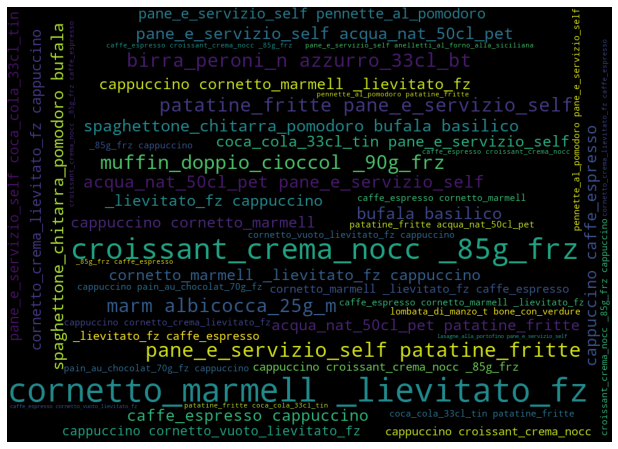

In [22]:
d = {}
for a, x in df_ngram.values:
    d[x] = a

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720,
                            collocations=False
                          ).generate_from_frequencies(d)
 
plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## Margin-Volume matrix


<AxesSubplot:>

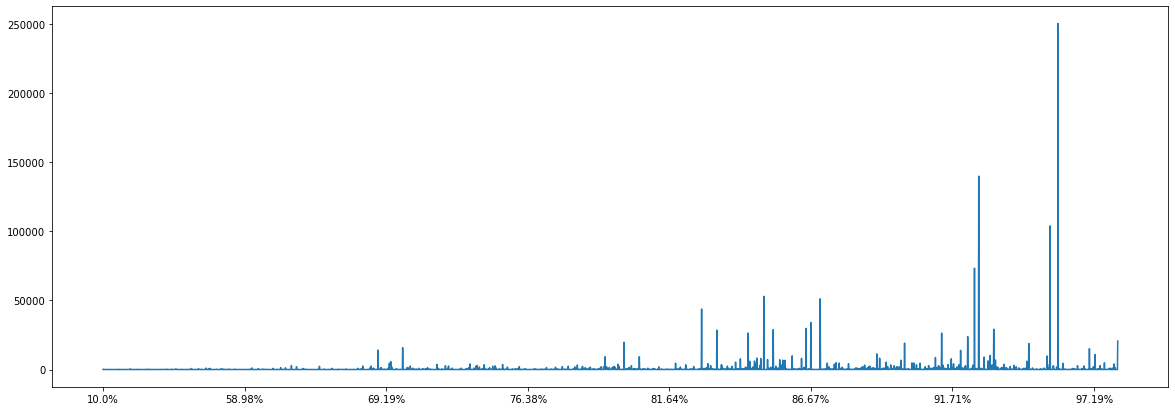

In [23]:
margins=seasonal_df['MARGIN'].value_counts()
margins=margins.drop(labels=['0.0%'])
margins.sort_index(inplace=True)
margins.plot(figsize=(20, 7))


<h2> Total earnings by weekend</h2>
<h4>Separate the data between weekend days and not.</h4>
<h4>Sunday - Wednesday  - Not weekend</h4>
<h4>Thursday - Saturday - Weekend.</h4>
<h4>Display the earning between them</h4>

<AxesSubplot:ylabel='None,WEEKEND_SALE'>

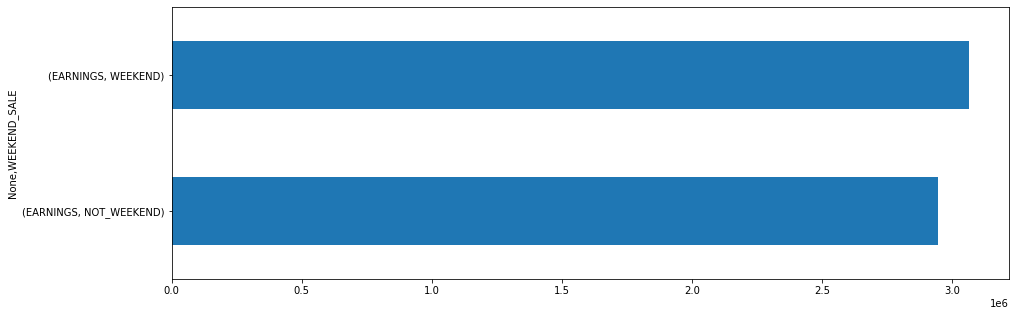

In [24]:
week_end_choice=['WEEKEND','NOT_WEEKEND']
weekend_mapping={}
for i in range(0,7):
    if(i in{4,6,5}):
        weekend_mapping[i]='WEEKEND'
    else:
        weekend_mapping[i]='NOT_WEEKEND'


seasonal_df['WEEKEND_SALE']=seasonal_df['SALE_DAY'].map(weekend_mapping)


seasonal_df.groupby(['WEEKEND_SALE']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(15,5))

<h1>Revenue per month</h1>

<AxesSubplot:ylabel='None,SALE_MONTH'>

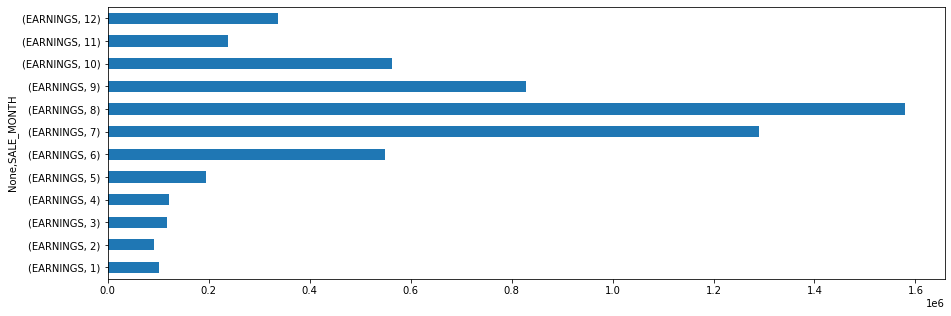

In [25]:
seasonal_df.groupby(['SALE_MONTH']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(15,5))

<h1>Products Popularity</h1>
<h4>Display the quantity of products between seasons </h4>

<AxesSubplot:ylabel='ITEM_CATEGORY'>

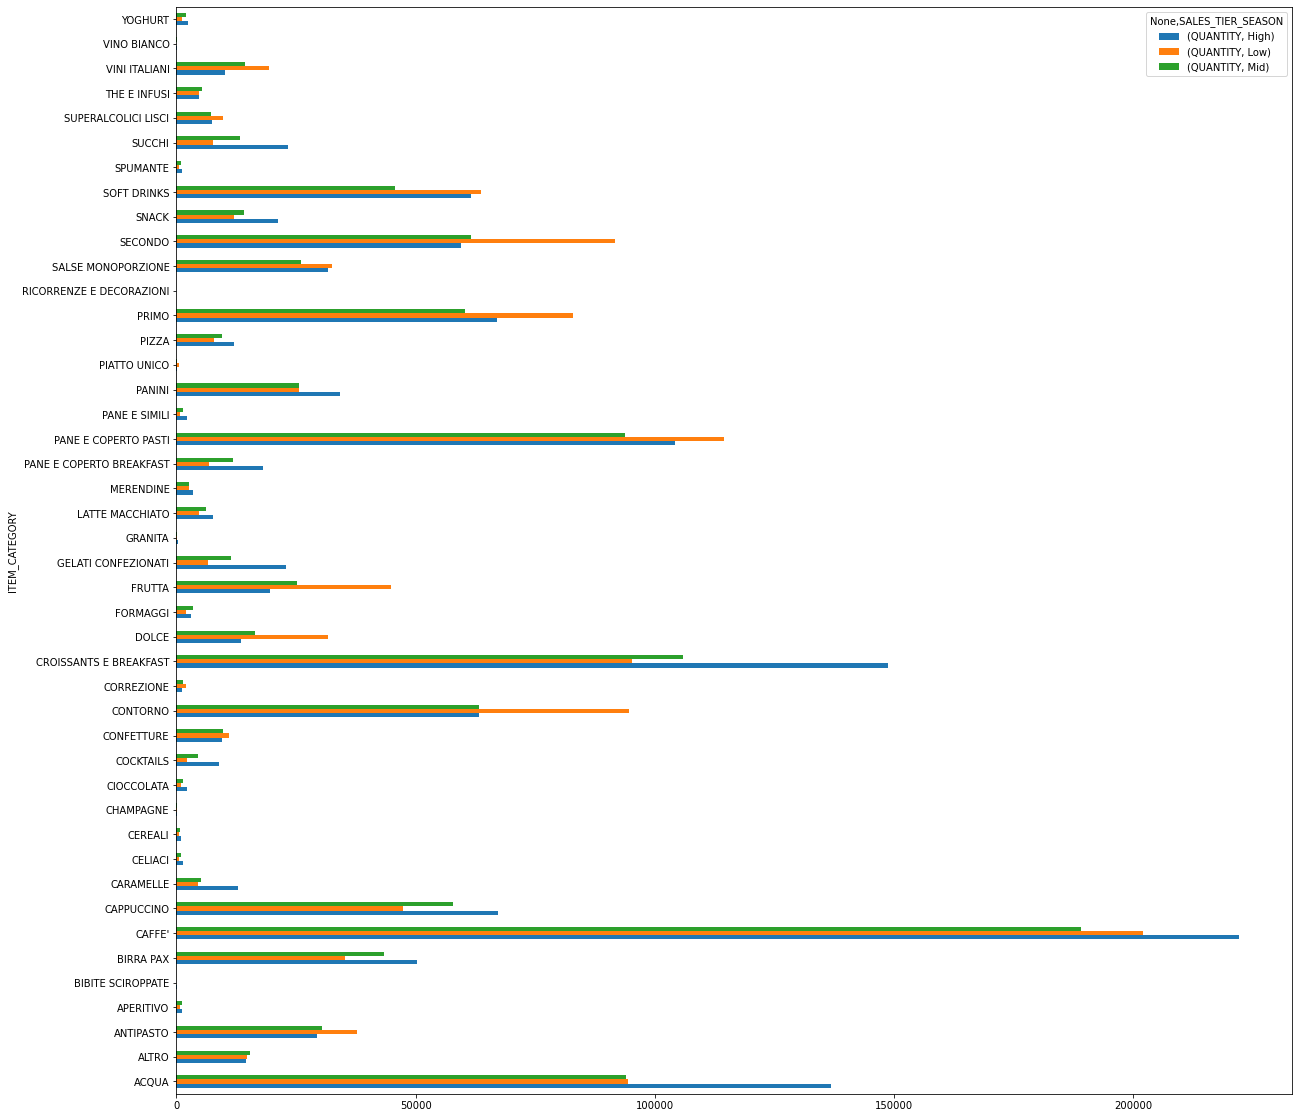

In [26]:
seasonal_df.groupby(['ITEM_CATEGORY','SALES_TIER_SEASON']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,20))

<h4>Display the quantity of products weekend and not weekend </h4>

<AxesSubplot:ylabel='ITEM_CATEGORY'>

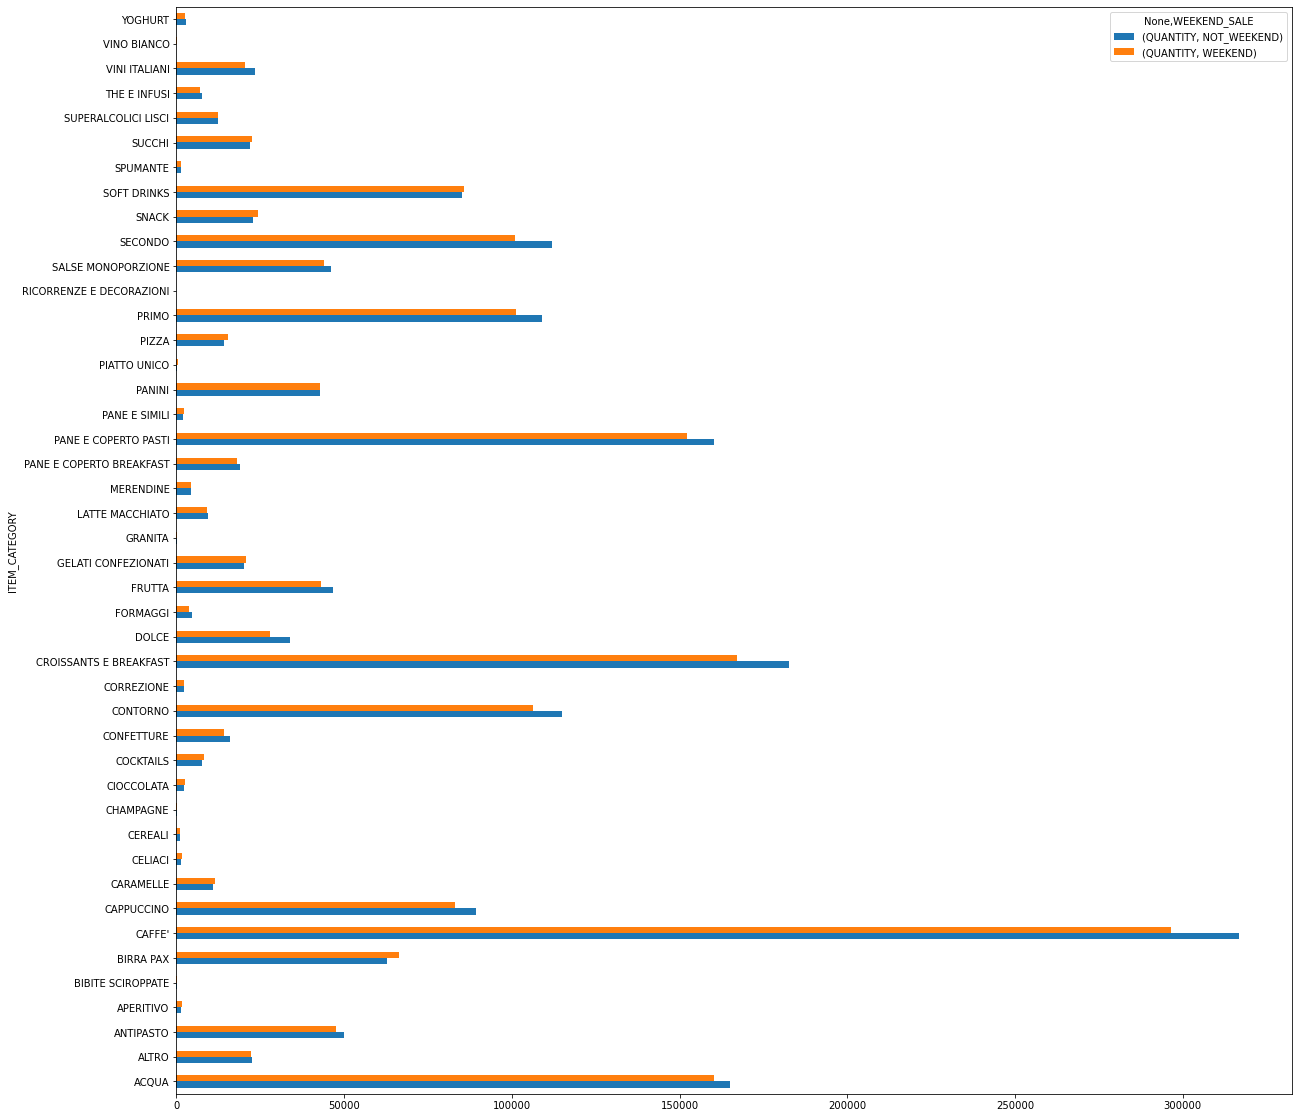

In [27]:
seasonal_df.groupby(['ITEM_CATEGORY','WEEKEND_SALE']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,20))

<h1>Separate the data to six groups according to seasons and weekends</h1>
<h4>Display the quantity </h4>

<AxesSubplot:ylabel='SALES_TIER_SEASON'>

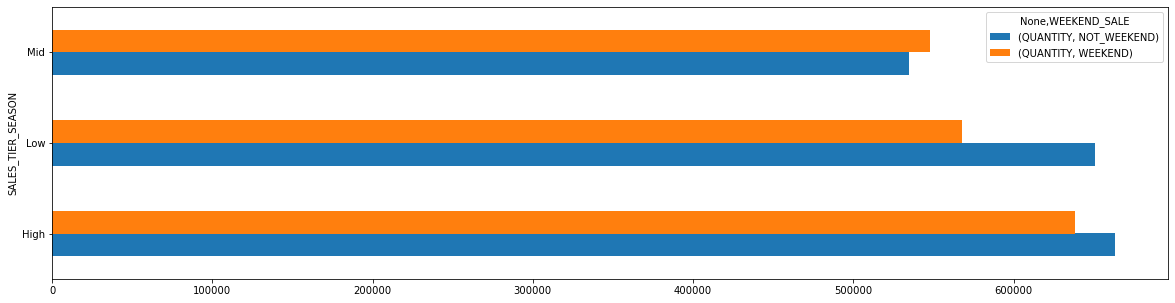

In [28]:
seasonal_df.groupby(['SALES_TIER_SEASON','WEEKEND_SALE']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,5))

<h4>Display the earnings </h4>

<AxesSubplot:ylabel='SALES_TIER_SEASON'>

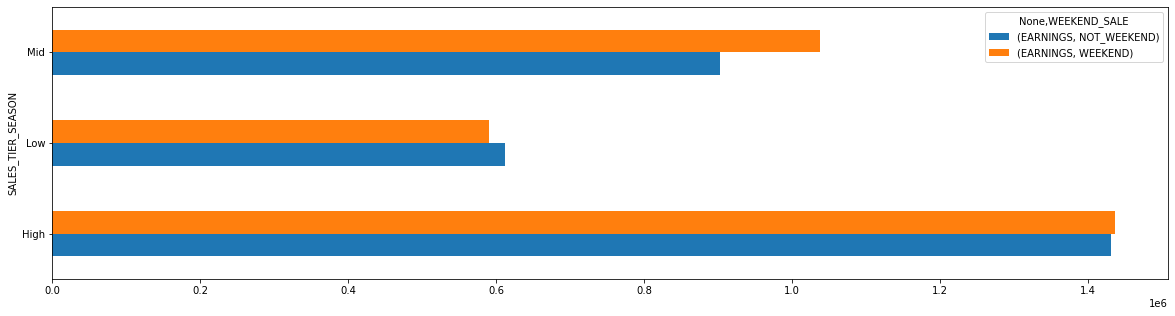

In [29]:
seasonal_df.groupby(['SALES_TIER_SEASON','WEEKEND_SALE']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(20,5))

# BCG Categorization 

In [30]:
food_df = seasonal_df[(seasonal_df['MENU_CATEGORY'] == 'FOOD')] # & (seasonal_df['DISCOUNT'] == 0) & (seasonal_df['PRICE_PAID'] != 0)]
food_df
#TODO: Devide the quantity for each item in every season by the total quantity sold in all seasons.

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE,PRICE_BEFORE_DISCOUNT,EARNINGS,SALE_MONTH,MARGIN,MARGIN_RAW,UNIT_PRICE,MENU_CATEGORY,Seasons,SALE_DAY,SALES_TIER_SEASON,SALES_TIER_DAYS,JOINED_ITEM,WEEKEND_SALE
3,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.0,1.8,0.36,SA1,1.8,-0.36,1,0.0%,0.00,0.0,FOOD,Winter,4,Low,High,CROISSANT_CREMA_NOCC._85G_FRZ,WEEKEND
6,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,6,80706,8.0,CORNETTO MARMELL. LIEVITATO FZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.0,1.8,0.31,SA1,1.8,-0.31,1,0.0%,0.00,0.0,FOOD,Winter,4,Low,High,CORNETTO_MARMELL._LIEVITATO_FZ,WEEKEND
7,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,7,81330,8.0,PAIN AU CHOCOLAT 70G FZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,1.8,0.0,0.27,NaN,1.8,1.53,1,85.0%,0.85,1.8,FOOD,Winter,4,Low,High,PAIN_AU_CHOCOLAT_70G_FZ,WEEKEND
10,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,8,81645,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.0,1.8,0.36,SA1,1.8,-0.36,1,0.0%,0.00,0.0,FOOD,Winter,4,Low,High,CROISSANT_CREMA_NOCC._85G_FRZ,WEEKEND
11,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,9,83037,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,1.8,0.0,0.36,NaN,1.8,1.44,1,80.0%,0.80,1.8,FOOD,Winter,4,Low,High,CROISSANT_CREMA_NOCC._85G_FRZ,WEEKEND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338033,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,POLPETTE IN UMIDO (C),FOOD,RICETTE FOOD,SECONDO,6,0.0,48.0,3.51,SA1,48.0,-3.51,12,0.0%,0.00,0.0,FOOD,Winter,5,Low,High,POLPETTE_IN_UMIDO_(C),WEEKEND
2338034,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,FRUTTA FRESCA,FOOD,RICETTE FOOD,FRUTTA,6,0.0,18.6,1.57,SA1,18.6,-1.57,12,0.0%,0.00,0.0,FOOD,Winter,5,Low,High,FRUTTA_FRESCA,WEEKEND
2338036,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,6,0.0,6.0,0.81,SA1,6.0,-0.81,12,0.0%,0.00,0.0,FOOD,Winter,5,Low,High,PANE_E_SERVIZIO_SELF,WEEKEND
2338037,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,VERDURA AL VAPORE,FOOD,RICETTE FOOD,CONTORNO,6,0.0,23.4,0.98,SA1,23.4,-0.98,12,0.0%,0.00,0.0,FOOD,Winter,5,Low,High,VERDURA_AL_VAPORE,WEEKEND


## Winter

In [31]:
# Deploying a Menu engineering on the winter

# Create group by items, for Quantity, margin Raw
winter_avg_items_df = food_df[food_df['Seasons'] == 'Winter'].groupby(['ITEM']).agg({'QUANTITY':sum, 'MARGIN_RAW':sum})

# Create a new columnn. Caculate the avg margin for each item.
winter_avg_items_df['AVG_MARGIN'] = winter_avg_items_df['MARGIN_RAW'] / winter_avg_items_df['QUANTITY']

# Caculate the Quantity sum - 101660
# TODO: Calculate the earnings as a whole number first and only then calculate the avg. margin.
total_quantity_winter_value = winter_avg_items_df['QUANTITY'].sum()

# create a coulumn that will present the Probabilty in Outlet (each quantity/Sum of quantity)
winter_avg_items_df['AVG_QUANTITY'] = winter_avg_items_df['QUANTITY'] / total_quantity_winter_value

# Number of Menu Items 649
menu_food_cost_winter_num_items_value = food_df[food_df['Seasons'] == 'Winter']['ITEM'].nunique()

# Check This value vs AVG_QUANTITY
 ## TODO Ask Maya! 1/countofitems * 0.7 or like this:
# winter_avg_items_df_menu_mix = 1 / menu_food_cost_winter_num_items_value * 0.7
winter_avg_items_df_menu_mix = (total_quantity_winter_value/menu_food_cost_winter_num_items_value) / total_quantity_winter_value

# AVG MARGIN Value
winter_avg_items_df_margin_value = winter_avg_items_df['AVG_MARGIN'].sum() / menu_food_cost_winter_num_items_value

# index to column
winter_avg_items_df = winter_avg_items_df.reset_index(level=0)

# Add a new column to the dataframe based on the AVG_MARGIN value
winter_avg_items_df['MARGIN_STATUS'] = winter_avg_items_df.apply(lambda row: 'High' if row['AVG_MARGIN'] > winter_avg_items_df_margin_value else 'Low', axis=1)

# Add a new column to the dataframe based on the AVG_QUANTITY value
winter_avg_items_df['QUANTITY_STATUS'] = winter_avg_items_df.apply(lambda row: 'High' if row['AVG_QUANTITY'] > winter_avg_items_df_menu_mix else 'Low', axis=1)

# Add a new column to the dataframe based on Margin_STATUS and Quantity_STATUS
def categorize(row):
    if row['MARGIN_STATUS'] == 'High' and row['QUANTITY_STATUS'] == 'High':
        return 'Star'
    elif row['MARGIN_STATUS'] == 'High' and row['QUANTITY_STATUS'] == 'Low':
        return 'Puzzle'
    elif row['MARGIN_STATUS'] == 'Low' and row['QUANTITY_STATUS'] == 'High':
        return 'PlowHorse'
    elif row['MARGIN_STATUS'] == 'Low' and row['QUANTITY_STATUS'] == 'Low':
        return 'Dog'

winter_avg_items_df['CATEGORY_CLASS'] = winter_avg_items_df.apply(categorize, axis=1)

winter_avg_items_df.to_csv("winter.csv")

# TODO:
# Ask Maya about the first item 0.0000


## Spring

In [32]:
# Deploying a Menu engineering on the winter

# Create group by items, for Quantity, margin Raw
spring_avg_items_df = food_df[food_df['Seasons'] == 'Spring'].groupby(['ITEM']).agg({'QUANTITY':sum, 'MARGIN_RAW':sum})

# Create a new columnn. Caculate the avg margin for each item.
spring_avg_items_df['AVG_MARGIN'] = spring_avg_items_df['MARGIN_RAW'] / spring_avg_items_df['QUANTITY']

# Caculate the Quantity sum 
total_quantity_spring_value = spring_avg_items_df['QUANTITY'].sum()

# create a coulumn that will present the Probabilty in Outlet (each quantity/Sum of quantity)
spring_avg_items_df['AVG_QUANTITY'] = spring_avg_items_df['QUANTITY'] / total_quantity_spring_value 

# Number of Menu Items 
menu_food_cost_spring_num_items_value = food_df[food_df['Seasons'] == 'Spring']['ITEM'].nunique()

# Check This value vs AVG_QUANTITY
spring_avg_items_df_menu_mix = (total_quantity_spring_value/menu_food_cost_spring_num_items_value) / total_quantity_spring_value


# AVG MARGIN Value
spring_avg_items_df_margin_value = spring_avg_items_df['AVG_MARGIN'].sum() / menu_food_cost_spring_num_items_value

# index to column
spring_avg_items_df = spring_avg_items_df.reset_index(level=0)

# Add a new column to the dataframe based on the AVG_MARGIN value
spring_avg_items_df['MARGIN_STATUS'] = spring_avg_items_df.apply(lambda row: 'High' if row['AVG_MARGIN'] > spring_avg_items_df_margin_value else 'Low', axis=1)

# Add a new column to the dataframe based on the AVG_QUANTITY value
spring_avg_items_df['QUANTITY_STATUS'] = spring_avg_items_df.apply(lambda row: 'High' if row['AVG_QUANTITY'] > spring_avg_items_df_menu_mix else 'Low', axis=1)


# Add a new column to the dataframe based on Margin_STATUS and Quantity_STATUS
def categorize(row):
    if row['MARGIN_STATUS'] == 'High' and row['QUANTITY_STATUS'] == 'High':
        return 'Star'
    elif row['MARGIN_STATUS'] == 'High' and row['QUANTITY_STATUS'] == 'Low':
        return 'Puzzle'
    elif row['MARGIN_STATUS'] == 'Low' and row['QUANTITY_STATUS'] == 'High':
        return 'PlowHorse'
    elif row['MARGIN_STATUS'] == 'Low' and row['QUANTITY_STATUS'] == 'Low':
        return 'Dog'

spring_avg_items_df['CATEGORY_CLASS'] = spring_avg_items_df.apply(categorize, axis=1)
spring_avg_items_df

,ITEM,QUANTITY,MARGIN_RAW,AVG_MARGIN,AVG_QUANTITY,MARGIN_STATUS,QUANTITY_STATUS,CATEGORY_CLASS
0,ACCIUGHE AL VERDE (C),67,6.274635,0.093651,0.000224,Low,Low,Dog
1,ACCIUGHE PANATE FRITTE,9,1.442857,0.160317,0.000030,Low,Low,Dog
2,AGNELLO AL FORNO CON PATATE E CARCIOFI,34,12.101875,0.355938,0.000114,High,Low,Puzzle
3,ALI DI POLLO SALE E PEPE (C),296,41.906250,0.141575,0.000988,Low,Low,Dog
4,ALPENLIEBE S.Z.ORIGINAL ASTUC.,55,17.688000,0.321600,0.000184,Low,Low,Dog
...,...,...,...,...,...,...,...,...
650,ZUPPA BORSCH,1,0.903636,0.903636,0.000003,High,Low,Puzzle
651,ZUPPA DI FAGIOLI (C),24,7.636364,0.318182,0.000080,Low,Low,Dog
652,ZUPPA DI LEGUMI (C),8,0.000000,0.000000,0.000027,Low,Low,Dog
653,ZUPPA DI LENTICCHIE (C),52,5.825455,0.112028,0.000174,Low,Low,Dog


## Autumn

In [33]:
# Deploying a Menu engineering on the winter

# Create group by items, for Quantity, margin Raw
autumn_avg_items_df = food_df[food_df['Seasons'] == 'Autumn'].groupby(['ITEM']).agg({'QUANTITY':sum, 'MARGIN_RAW':sum})

# Create a new columnn. Caculate the avg margin for each item.
autumn_avg_items_df['AVG_MARGIN'] = autumn_avg_items_df['MARGIN_RAW'] / autumn_avg_items_df['QUANTITY']

# Caculate the Quantity sum 
total_quantity_autumn_value = autumn_avg_items_df['QUANTITY'].sum()

# create a coulumn that will present the Probabilty in Outlet (each quantity/Sum of quantity)
autumn_avg_items_df['AVG_QUANTITY'] = autumn_avg_items_df['QUANTITY'] / total_quantity_autumn_value

# Number of Menu Items 
menu_food_cost_autumn_num_items_value = food_df[food_df['Seasons'] == 'Autumn']['ITEM'].nunique()

# Check This value vs AVG_QUANTITY
autumn_avg_items_df_menu_mix = (total_quantity_autumn_value/menu_food_cost_autumn_num_items_value) / total_quantity_autumn_value

# AVG MARGIN Value
autumn_avg_items_df_margin_value = autumn_avg_items_df['AVG_MARGIN'].sum() / menu_food_cost_autumn_num_items_value

# index to column
autumn_avg_items_df = autumn_avg_items_df.reset_index(level=0)

# Add a new column to the dataframe based on the AVG_MARGIN value
autumn_avg_items_df['MARGIN_STATUS'] = autumn_avg_items_df.apply(lambda row: 'High' if row['AVG_MARGIN'] > autumn_avg_items_df_margin_value else 'Low', axis=1)

# Add a new column to the dataframe based on the AVG_QUANTITY value
autumn_avg_items_df['QUANTITY_STATUS'] = autumn_avg_items_df.apply(lambda row: 'High' if row['AVG_QUANTITY'] > autumn_avg_items_df_menu_mix else 'Low', axis=1)


# Add a new column to the dataframe based on Margin_STATUS and Quantity_STATUS
def categorize(row):
    if row['MARGIN_STATUS'] == 'High' and row['QUANTITY_STATUS'] == 'High':
        return 'Star'
    elif row['MARGIN_STATUS'] == 'High' and row['QUANTITY_STATUS'] == 'Low':
        return 'Puzzle'
    elif row['MARGIN_STATUS'] == 'Low' and row['QUANTITY_STATUS'] == 'High':
        return 'PlowHorse'
    elif row['MARGIN_STATUS'] == 'Low' and row['QUANTITY_STATUS'] == 'Low':
        return 'Dog'

autumn_avg_items_df['CATEGORY_CLASS'] = autumn_avg_items_df.apply(categorize, axis=1)
autumn_avg_items_df

,ITEM,QUANTITY,MARGIN_RAW,AVG_MARGIN,AVG_QUANTITY,MARGIN_STATUS,QUANTITY_STATUS,CATEGORY_CLASS
0,ABBACCHIO AL FORNO CON PATATE,488,72.748475,0.149075,0.000880,Low,Low,Dog
1,ACCIUGHE AL VERDE (C),17,0.723188,0.042540,0.000031,Low,Low,Dog
2,AGNELLO AL FORNO CON PATATE E CARCIOFI,178,11.723596,0.065863,0.000321,Low,Low,Dog
3,ALI DI POLLO SALE E PEPE (C),554,300.039340,0.541587,0.000999,High,Low,Puzzle
4,ALPENLIEBE S.Z.ORIGINAL ASTUC.,137,55.204333,0.402951,0.000247,Low,Low,Dog
...,...,...,...,...,...,...,...,...
690,VERDURE GRIGLIATE E MOZZARELLA,18,7.234783,0.401932,0.000032,Low,Low,Dog
691,VITELLO CON VERDURE (C),292,69.393874,0.237650,0.000527,Low,Low,Dog
692,YOGURT IND. ALLA FRUTTA,1398,529.213829,0.378551,0.002521,Low,High,PlowHorse
693,YOGURT IND. NATURALE,686,311.873586,0.454626,0.001237,High,Low,Puzzle


## Summer

In [34]:
# Deploying a Menu engineering on the winter

# Create group by items, for Quantity, margin Raw
summer_avg_items_df = food_df[food_df['Seasons'] == 'Summer'].groupby(['ITEM']).agg({'QUANTITY':sum, 'MARGIN_RAW':sum})

# Create a new columnn. Caculate the avg margin for each item.
summer_avg_items_df['AVG_MARGIN'] = summer_avg_items_df['MARGIN_RAW'] / summer_avg_items_df['QUANTITY']

# Caculate the Quantity sum 
total_quantity_summer_value = summer_avg_items_df['QUANTITY'].sum()

# create a coulumn that will present the Probabilty in Outlet (each quantity/Sum of quantity)
summer_avg_items_df['AVG_QUANTITY'] = summer_avg_items_df['QUANTITY'] / total_quantity_summer_value

# Number of Menu Items 
menu_food_cost_summer_num_items_value = food_df[food_df['Seasons'] == 'Autumn']['ITEM'].nunique()

# Check This value vs AVG_QUANTITY
#summer_avg_items_df_menu_mix = (1/menu_food_cost_summer_num_items_value) * 0.7
summer_avg_items_df_menu_mix = (total_quantity_summer_value/menu_food_cost_summer_num_items_value)  / total_quantity_summer_value

# AVG MARGIN Value
summer_avg_items_df_margin_value = summer_avg_items_df['AVG_MARGIN'].sum() / menu_food_cost_summer_num_items_value

# index to column
summer_avg_items_df = summer_avg_items_df.reset_index(level=0)

# Add a new column to the dataframe based on the AVG_MARGIN value
summer_avg_items_df['MARGIN_STATUS'] = summer_avg_items_df.apply(lambda row: 'High' if row['AVG_MARGIN'] > summer_avg_items_df_margin_value else 'Low', axis=1)

# Add a new column to the dataframe based on the AVG_QUANTITY value
summer_avg_items_df['QUANTITY_STATUS'] = summer_avg_items_df.apply(lambda row: 'High' if row['AVG_QUANTITY'] > summer_avg_items_df_menu_mix else 'Low', axis=1)


# Add a new column to the dataframe based on Margin_STATUS and Quantity_STATUS
def categorize(row):
    if row['MARGIN_STATUS'] == 'High' and row['QUANTITY_STATUS'] == 'High':
        return 'Star'
    elif row['MARGIN_STATUS'] == 'High' and row['QUANTITY_STATUS'] == 'Low':
        return 'Puzzle'
    elif row['MARGIN_STATUS'] == 'Low' and row['QUANTITY_STATUS'] == 'High':
        return 'PlowHorse'
    elif row['MARGIN_STATUS'] == 'Low' and row['QUANTITY_STATUS'] == 'Low':
        return 'Dog'

summer_avg_items_df['CATEGORY_CLASS'] = summer_avg_items_df.apply(categorize, axis=1)
summer_avg_items_df

,ITEM,QUANTITY,MARGIN_RAW,AVG_MARGIN,AVG_QUANTITY,MARGIN_STATUS,QUANTITY_STATUS,CATEGORY_CLASS
0,ABBACCHIO AL FORNO CON PATATE,359,90.357713,0.251693,0.000415,Low,Low,Dog
1,ACCIUGHE PANATE FRITTE,20,0.000000,0.000000,0.000023,Low,Low,Dog
2,AGNELLO AL FORNO CON PATATE E CARCIOFI,156,36.388091,0.233257,0.000180,Low,Low,Dog
3,AGRUMI SI SICILIA MONOPORZIONE,1,0.724138,0.724138,0.000001,High,Low,Puzzle
4,ALI DI POLLO SALE E PEPE (C),82,55.474120,0.676514,0.000095,High,Low,Puzzle
...,...,...,...,...,...,...,...,...
742,VITELLO CON VERDURE (C),58,26.991997,0.465379,0.000067,Low,Low,Dog
743,YOGURT IND. ALLA FRUTTA,1821,1128.844309,0.619904,0.002106,High,High,Star
744,YOGURT IND. NATURALE,856,546.832873,0.638823,0.000990,High,Low,Puzzle
745,ZUCCHINE A SCAPECE (C),47,7.041674,0.149823,0.000054,Low,Low,Dog


### Seasons Summary

In [35]:
# Create a list of all items from all dataframes
all_items = list(set(winter_avg_items_df['ITEM']).union(set(summer_avg_items_df['ITEM']), set(spring_avg_items_df['ITEM']), set(autumn_avg_items_df['ITEM'])))

# Initialize the bcg_food_category_df DataFrame with object data type for all columns
bcg_food_category_df = pd.DataFrame(index=all_items, columns=['WINTER', 'SUMMER', 'SPRING', 'AUTUMN'], dtype='object')

# Fill in the values from the winter_avg_items_df dataframe
for item in winter_avg_items_df['ITEM']:
    bcg_food_category_df.at[item, 'WINTER'] = winter_avg_items_df.loc[winter_avg_items_df['ITEM'] == item, 'CATEGORY_CLASS'].iloc[0]

# Fill in the values from the summer_avg_items_df dataframe
for item in summer_avg_items_df['ITEM']:
    bcg_food_category_df.at[item, 'SUMMER'] = summer_avg_items_df.loc[summer_avg_items_df['ITEM'] == item, 'CATEGORY_CLASS'].iloc[0]

# Fill in the values from the spring_avg_items_df dataframe
for item in spring_avg_items_df['ITEM']:
    bcg_food_category_df.at[item, 'SPRING'] = spring_avg_items_df.loc[spring_avg_items_df['ITEM'] == item, 'CATEGORY_CLASS'].iloc[0]

# Fill in the values from the autumn_avg_items_df dataframe
for item in autumn_avg_items_df['ITEM']:
    bcg_food_category_df.at[item, 'AUTUMN'] = autumn_avg_items_df.loc[autumn_avg_items_df['ITEM'] == item, 'CATEGORY_CLASS'].iloc[0]

# Convert the data type of all columns to object
bcg_food_category_df = bcg_food_category_df.astype('object')
bcg_food_category_df

,WINTER,SUMMER,SPRING,AUTUMN
BRANZINO FRESCO ALLA GRIGLIA,Dog,Dog,Dog,Puzzle
BAGUETTE TONNO POMODORO HARISSA MOHA PANE BORDO,Puzzle,NaN,NaN,Puzzle
SCALOPPINE DI TACCHINO AI FUNGHI (C),PlowHorse,Dog,PlowHorse,Dog
PENNE AL SUGO DI COZZE,Dog,Dog,Dog,NaN
NUTELLA INDIVIDUALE 120X15G,NaN,Dog,NaN,NaN
...,...,...,...,...
INSALATA RIVIERA BAR,NaN,Puzzle,NaN,NaN
PASTA LASAGNE RAGU 300G S/G FZ,Puzzle,Dog,NaN,NaN
FARFALLE POMODORO E BASILICO (C),Puzzle,Puzzle,Dog,Puzzle
RAVIOLI NO GLUTINE VERDURE E GAMBERI,Dog,Dog,NaN,Dog


# Average Margin for each item in every season.

In [36]:
# Define your dataframes: summer_avg_items_df, autumn_avg_items_df, winter_avg_items_df, spring_avg_items_df

# Get a list of all unique items across all dataframes
all_items = list(set(summer_avg_items_df.index) | set(winter_avg_items_df.index) | set(autumn_avg_items_df.index) | set(spring_avg_items_df.index))

# Initialize the avg_margin_item_by_seasons dataframe
avg_margin_item_by_seasons = pd.DataFrame(index=all_items, columns=['summer', 'winter', 'autumn', 'spring'])

# Calculate the average margin for each season for each item
for item in all_items:
    # Calculate average margin for summer
    if item in summer_avg_items_df.index:
        avg_margin_summer = summer_avg_items_df.loc[item, 'AVG_MARGIN']
    else:
        avg_margin_summer = 0
    
    # Calculate average margin for winter
    if item in winter_avg_items_df.index:
        avg_margin_winter = winter_avg_items_df.loc[item, 'AVG_MARGIN']
    else:
        avg_margin_winter = 0
    
    # Calculate average margin for fall
    if item in autumn_avg_items_df.index:
        avg_margin_fall = autumn_avg_items_df.loc[item, 'AVG_MARGIN']
    else:
        avg_margin_fall = 0
    
    # Calculate average margin for spring
    if item in spring_avg_items_df.index:
        avg_margin_spring = spring_avg_items_df.loc[item, 'AVG_MARGIN']
    else:
        avg_margin_spring = 0
    
    # Set the values in the avg_margin_item_by_seasons dataframe
    avg_margin_item_by_seasons.loc[item] = [avg_margin_summer, avg_margin_winter, avg_margin_fall, avg_margin_spring]
    
avg_margin_item_by_seasons

,summer,winter,autumn,spring
0,0.251693,0.176218,0.149075,0.093651
1,0.0,0.0,0.04254,0.160317
2,0.233257,0.217696,0.065863,0.355938
3,0.724138,0.114753,0.541587,0.141575
4,0.676514,0.359569,0.402951,0.3216
...,...,...,...,...
742,0.465379,0,0,0
743,0.619904,0,0,0
744,0.638823,0,0,0
745,0.149823,0,0,0
